In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import toolkit as tk
t,tau,w = symbols('t tau omega',real=True)
s = Symbol('s')
j = I
jw = j*w
init_printing()

In [3]:
roots(s**2+4*s+4)

In [11]:
y = Function('y')
u = Heaviside(t)
H = 3*s/(s**2+6*s+8)
H
ics = {y(0):0,y(t).diff(t).subs(t,0):0}
tk.odeImpulse(H,ics).expand().collect(u)

In [12]:
inverse_laplace_transform(H,s,t)

In [19]:
h = 6*exp(-t/4)*u
ys = integrate(h.subs(t,tau),(tau,0,t))
yr = integrate(ys.subs(t,tau),(tau,0,t))
ys.expand().collect(u),yr.expand().collect(u)

In [23]:
H = laplace_transform(h,t,s)[0]
ys = inverse_laplace_transform(H/s,s,t)
yr = inverse_laplace_transform(H/s/s,s,t)
ys.expand().collect(u),yr.expand().collect(u)

In [25]:
f = exp(-3*t)*u
g = t*exp(-3*t)*u
tk.convolve(f,g)

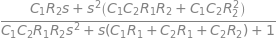

In [129]:
R1,R2,C1,C2 = symbols('R_1,R_2,C_1,C_2',real=True)
Z1 = 1/(s*C1)
Z2 = 1/(s*C2)
Zt = Z1 + (R1*(Z2+R2))/(R1+Z2+R2)
H = cancel((R2/Zt).simplify(),s)
H

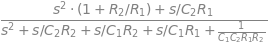

In [137]:
a2 = denom(H).coeff(s,2)
P = (numer(H)/a2).expand()
Q = (denom(H)/a2).expand()
display(P,Q)
Hr = P/Q
Hr.collect(s**2)

In [57]:
H.subs(s,0)

In [59]:
tk.odeImpulse(H,{y(0):0})

In [56]:
ys = inverse_laplace_transform((H/s).simplify(),s,t).subs({R1:10e3,R2:10e3,C1:10e-9,C2:10e-9})
ys

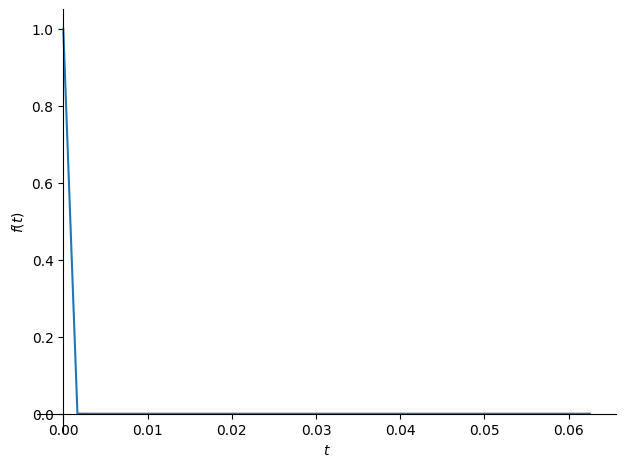

In [55]:
plot(ys,(t,0,10))

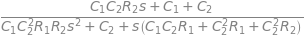

In [66]:
R1,R2,C1,C2 = symbols('R_1,R_2,C_1,C_2',real=True)
Z1 = 1/(s*C1)
Z2 = 1/(s*C2)
Zt = R1 + (Z1*(R2+Z2))/(Z1+R2+Z2)
H = cancel((Z2/Zt).simplify(),s)
H

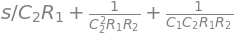

In [71]:
a2 = denom(H).coeff(s,2)
P = (numer(H)/a2)
Q = (denom(H)/a2)
display(P.expand(),Q.expand())

In [72]:
laplace_transform(exp(-2*t),t,s)

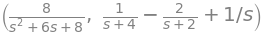

In [77]:
H = 8/(s**2+6*s+8)
Ys = H/s
H,apart(Ys)

In [80]:
tk.step(H)

In [82]:
x = Function('x')
tk.ode2tf(Eq(diff(y(t),t,2)+6*y(t).diff(t)+8*y(t),x(t)))

In [84]:
H = 13*s/(s**2+4*s+13)
tk.step(H)

In [87]:
ode = Eq(diff(y(t),t,2)+4*y(t).diff(t)+13*y(t),13*x(t))
ics = {y(0):2,y(t).diff(t).subs(t,0):3}
Y_zi = tk.lap_with_ic(ode,ic=ics,tf_out=0)
Y_zi

In [89]:
inverse_laplace_transform(Y_zi,s,t).collect(exp(-2*t))

In [93]:
cancel(laplace_transform(exp(-2*t)*(S(11)/3*sin(3*t)+2*cos(3*t))*u,t,s)[0])

In [95]:
PO = 62.09
tp = 0.6355
a = ln(PO/100)
damp = (abs(a)/(sqrt(pi**2+a**2))).evalf()
wn = (pi/(tp*sqrt(1-damp**2))).evalf()
wn,damp

In [96]:
1/sqrt(2.)

In [98]:
H = wn**2/(s**2+2*damp*wn*s+wn**2)
H

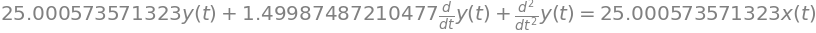

In [101]:
ode = Eq(tk.sDiff((y(t)*denom(H)).expand()),x(t)*numer(H))
ode

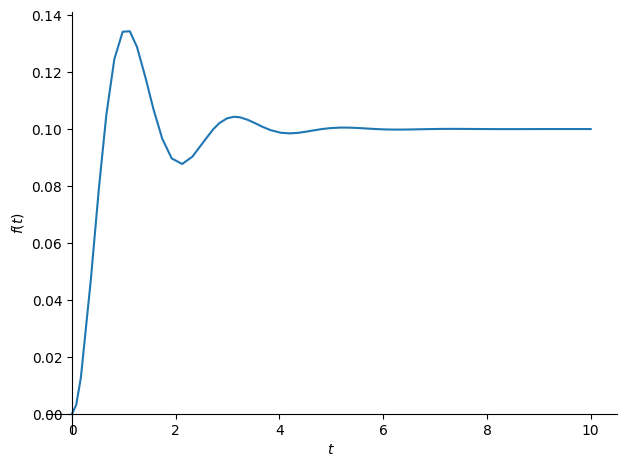

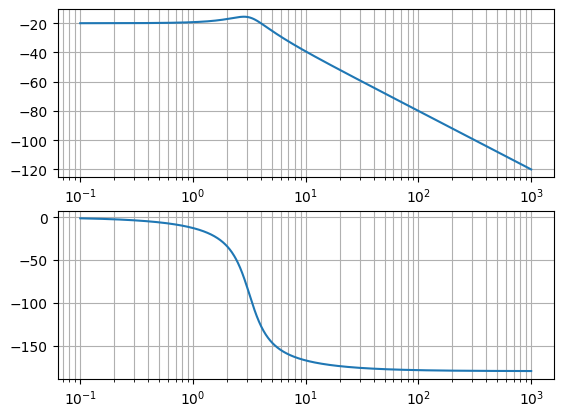

In [104]:
# A
r = -1+3*j
H = 1/((s-r)*(s-r.conjugate()))
plot(tk.step(H),(t,0,10))
tk.bode(H)

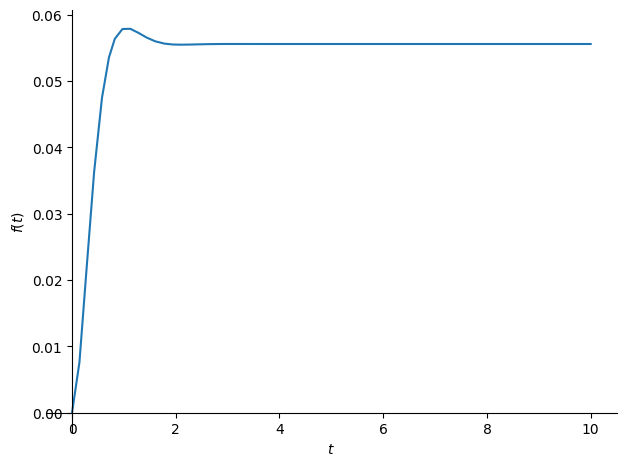

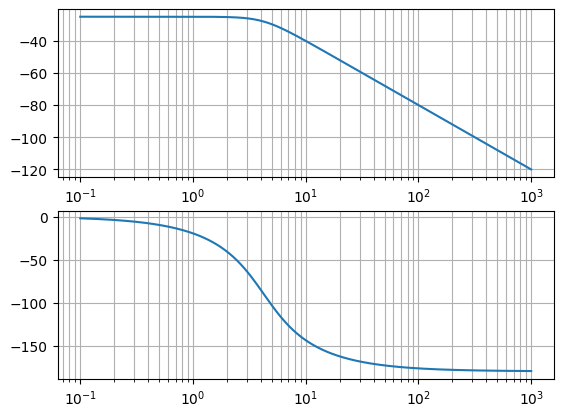

In [105]:
# D
r = -3+3*j
H = 1/((s-r)*(s-r.conjugate()))
plot(tk.step(H),(t,0,10))
tk.bode(H)

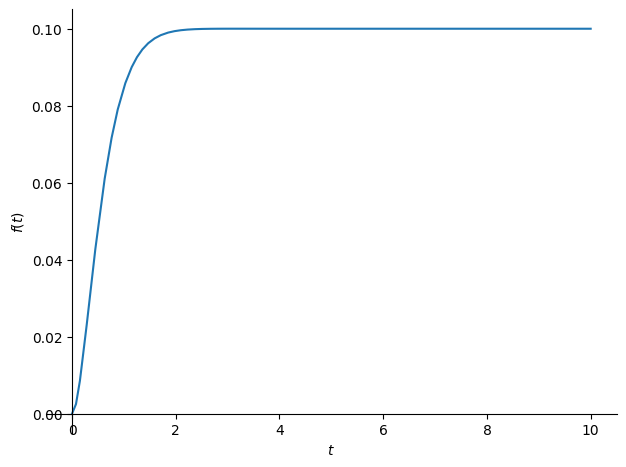

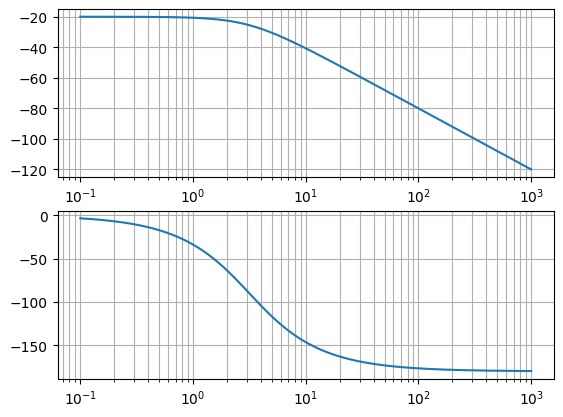

In [106]:
# G
r = -3+1*j
H = 1/((s-r)*(s-r.conjugate()))
plot(tk.step(H),(t,0,10))
tk.bode(H)

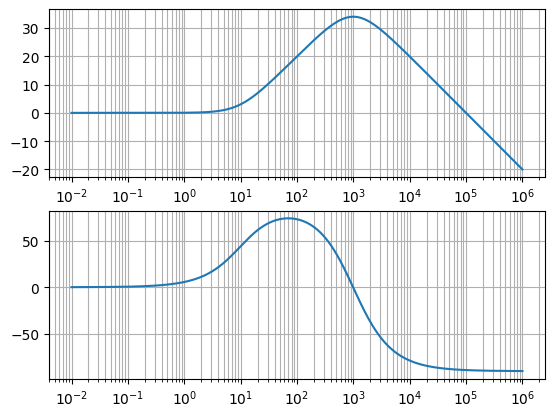

In [107]:
P = (s/10+1)
Q = (s/1000+1)**2
H = cancel(P/Q)
tk.bode(H,pltrange=(-2,6))

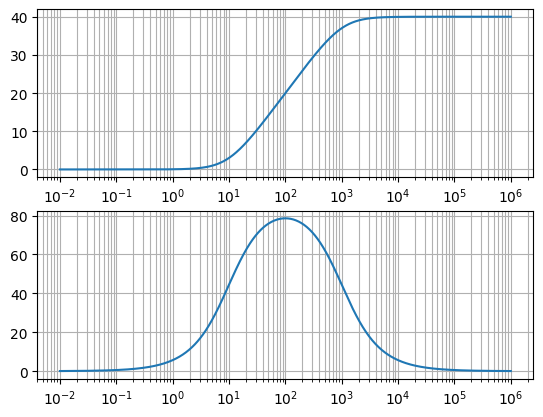

In [108]:
P = (s/10+1)
Q = (s/1000+1)
H = cancel(P/Q)
tk.bode(H,pltrange=(-2,6))

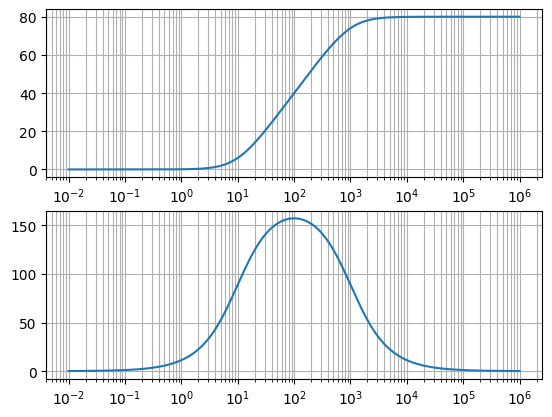

In [109]:
P = (s/10+1)**2
Q = (s/1000+1)**2
H = cancel(P/Q)
tk.bode(H,pltrange=(-2,6))

In [113]:
5e3/2**8

In [115]:
DR = 6*8
DR

In [118]:
L,a,rho = symbols('L a rho',real=True)
R = rho*L/(pi*a**2)
display(tk.sensitivity(R,rho),tk.sensitivity(R,L),tk.sensitivity(R,a))

In [173]:
a10,a20,a12,a22 = 1,1,1,1
a11 = 0.765367
a21 = 1.84776

In [174]:
rat_1 = 4*a10/a11**2
rat_2 = 4*a20/a21**2
rat_1,rat_2

In [176]:
Q_1 = sqrt(a10)/a11
Q_2 = sqrt(a20)/a21
Q_1,Q_2

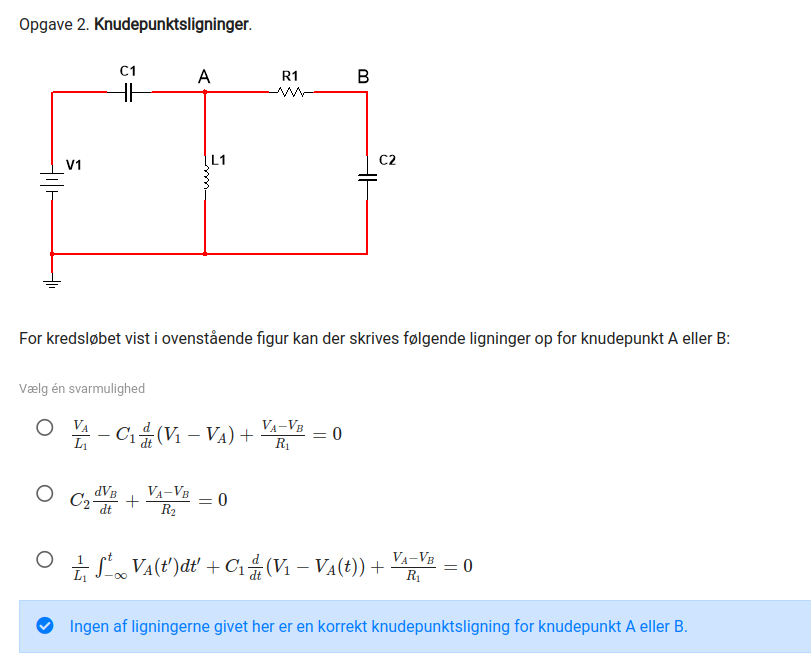

In [126]:
ode = Eq(diff(y(t),t,2)+6*diff(y(t),t,2)+8*y(t),3*x(t).diff(t))
ics = {y(0):0}
H = 3*s/(s**2+6*s+8)
tk.odeImpulse(H,ics).expand().collect(u)

In [128]:
inverse_laplace_transform(H,s,t).collect(u)

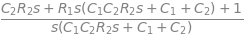

In [139]:
Zt = R1+((R2+Z2)*Z1)/(R2+Z2+Z1)
Zt.simplify()

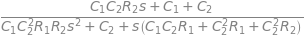

In [145]:
H = Z2/Zt
H = cancel(H.expand(),s)
H

In [153]:
a2 = denom(H).coeff(s,2)
P = (numer(H)/a2).expand().collect(s)
Q = (denom(H)/a2).expand().collect(s)
Hh = P/Q

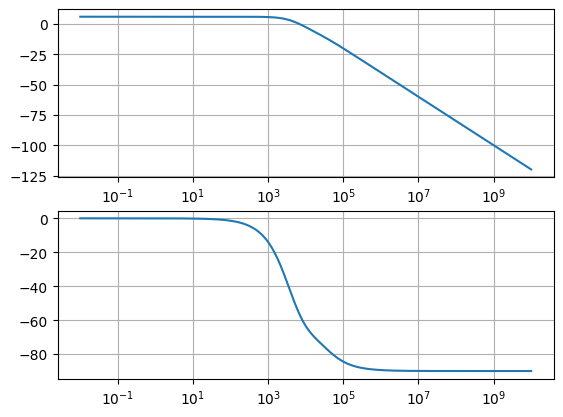

In [157]:
Hh = Hh.subs({R1:10e3,R2:10e3,C1:10e-9,C2:10e-9})
tk.bode(Hh,pltrange=(-2,10))

In [156]:
Hh

In [164]:
H = 8/(s**2+6*s+8)
H

In [159]:
tk.step(H)

In [165]:
apart(H/s)

In [167]:
ode = diff(y(t),t,2)+4*diff(y(t),t)+13*y(t)
ics = {y(0):2,y(t).diff(t).subs(t,0):3}
dsolve(ode,y(t),ics=ics)


In [168]:
H = 25/(s**2+3/2*s+25)
tk.step_info(H)

{'Overshoot': 62.0871272922706,
 'Peak Time': 0.635508678020980,
 'Settling Time': 5.33333333333333,
 'Rise Time': 0.200625500000000,
 'Delay Time': 0.225860500000000}

In [169]:
tk.wnDamp(H)

In [170]:
1/sqrt(2.)

In [172]:
n = 4
S(1)/4**n

In [180]:
ode = Eq(diff(y(t),t,2)+6*diff(y(t))+8*y(t),0)
ics = {y(0):0,y(t).diff(t).subs(t,0):1}
yn = dsolve(ode,y(t),ics=ics).rhs
yn

In [182]:
h = 3*yn.diff(t)
h.expand()

In [187]:
h = (3*exp(-2*t)-6*exp(-4*t))*u
H = laplace_transform(h,t,s)[0]
cancel(H,s)

In [190]:
h = -S(6)/4*exp(-t/4)*u
H = laplace_transform(h,t,s)[0]*s
inverse_laplace_transform(cancel(H),s,t)

In [192]:
tk.fixH(integrate(exp(-3*(t-tau))*u*tau*exp(-3*tau)*u,(tau,0,t)))